In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

loading precomputed roc-auc

parse logfile

In [2]:
def parse_train_log(filename):
    with open(filename) as f:
        log_info=f.readlines()
    
    log_dict={}
    for string in log_info:
        if 'Arguments' in string:
            task_name=string[string.index('experiment_name'):].split("'")[1]
            print(task_name)
            log_dict[task_name]={'train loss':[],'val loss':[],'test loss':[],
                             'train auc':[],'val auc':[],'test auc':[]}
        if  'Loss Train' in string:
            log_dict[task_name]['train loss'].append(float(string.split()[-1]))
        elif 'Loss Val' in string:
            log_dict[task_name]['val loss'].append(float(string.split()[-1]))
        elif 'Loss Test' in string:
            log_dict[task_name]['test loss'].append(float(string.split()[-1]))
        elif 'ROC-AUC Train' in string:
            log_dict[task_name]['train auc'].append(float(string.split()[-1]))
        elif 'ROC-AUC Val' in string:
            log_dict[task_name]['val auc'].append(float(string.split()[-1]))
        elif 'ROC-AUC Test' in string:
            log_dict[task_name]['test auc'].append(float(string.split()[-1]))
    return log_dict

In [3]:
def dict_to_df(log_dict):
    d=pd.DataFrame(index=['train','val','test'])
    ke=sorted(log_dict)
    for k in ke:
        d[k]=[
        '{:.5f}'.format(max(log_dict[k]['train auc'])),
        '{:.5f}'.format(max(log_dict[k]['val auc'])),
        '{:.5f}'.format(log_dict[k]['test auc'][np.argmax(log_dict[k]['val auc'])])
        ]
    return(d)

In [33]:
def draw_curves(ax, log_dict):
    colors=['red','blue','green','orange','purple','yellow', 'magenta', 'gray']
    ax[0].set_title('Train Loss')
    ax[1].set_title('Validation Loss')
    ax[2].set_title('Train AUC')
    ax[3].set_title('Validation AUC')

    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Loss')
    ax[2].set_ylabel('AUC')
    ax[3].set_ylabel('AUC')

    for i, k in enumerate(sorted(log_dict)):
        ax[0].plot(log_dict[k]['train loss'], color=colors[i], alpha=1,label=k)
        ax[1].plot(log_dict[k]['val loss'], color=colors[i], alpha=0.6,label=k)
        #ax[1].plot(log_dict[k]['test loss'], color=colors[i], alpha=0.3,label=k+' test')
        ax[2].plot(log_dict[k]['train auc'], color=colors[i], alpha=1,label=k)
        ax[3].plot(log_dict[k]['val auc'], color=colors[i], alpha=0.6,label=k)
        #ax[3].plot(log_dict[k]['test auc'], color=colors[i], alpha=0.3,label=k+' test')  
    ax[0].legend()    

orig_atomnet
orig_atomnet_v
orig_atomnet_mp
orig_atomnet_v_mp
binary_dna_atomnet
binary_dna_atomnet_v
binary_dna_atomnet_mp
binary_dna_atomnet_v_mp
binary_dna_atomnet
binary_dna_atomnet_v
binary_dna_atomnet_mp
binary_dna_atomnet_v_mp
binary_rna_atomnet
binary_rna_atomnet_v
binary_rna_atomnet_mp
binary_rna_atomnet_v_mp
binary_rna_atomnet
binary_rna_atomnet_v
binary_rna_atomnet_mp
binary_rna_atomnet_v_mp


,orig_atomnet,orig_atomnet_mp,orig_atomnet_v,orig_atomnet_v_mp
train,0.85097,0.84885,0.84291,0.85131
val,0.82853,0.84844,0.84950,0.84451
test,0.85479,0.87042,0.86116,0.86882


,binary_dna_atomnet,binary_dna_atomnet_mp,binary_dna_atomnet_v,binary_dna_atomnet_v_mp
train,0.93929,0.94281,0.93478,0.94697
val,0.92086,0.94349,0.92422,0.94461
test,0.89681,0.91618,0.90204,0.92115


,binary_rna_atomnet,binary_rna_atomnet_mp,binary_rna_atomnet_v,binary_rna_atomnet_v_mp
train,0.90825,0.90456,0.90908,0.91008
val,0.87347,0.91391,0.90373,0.91127
test,0.86878,0.87936,0.87851,0.88144


/home/domain/data/prog/miniconda3/envs/dmasif/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


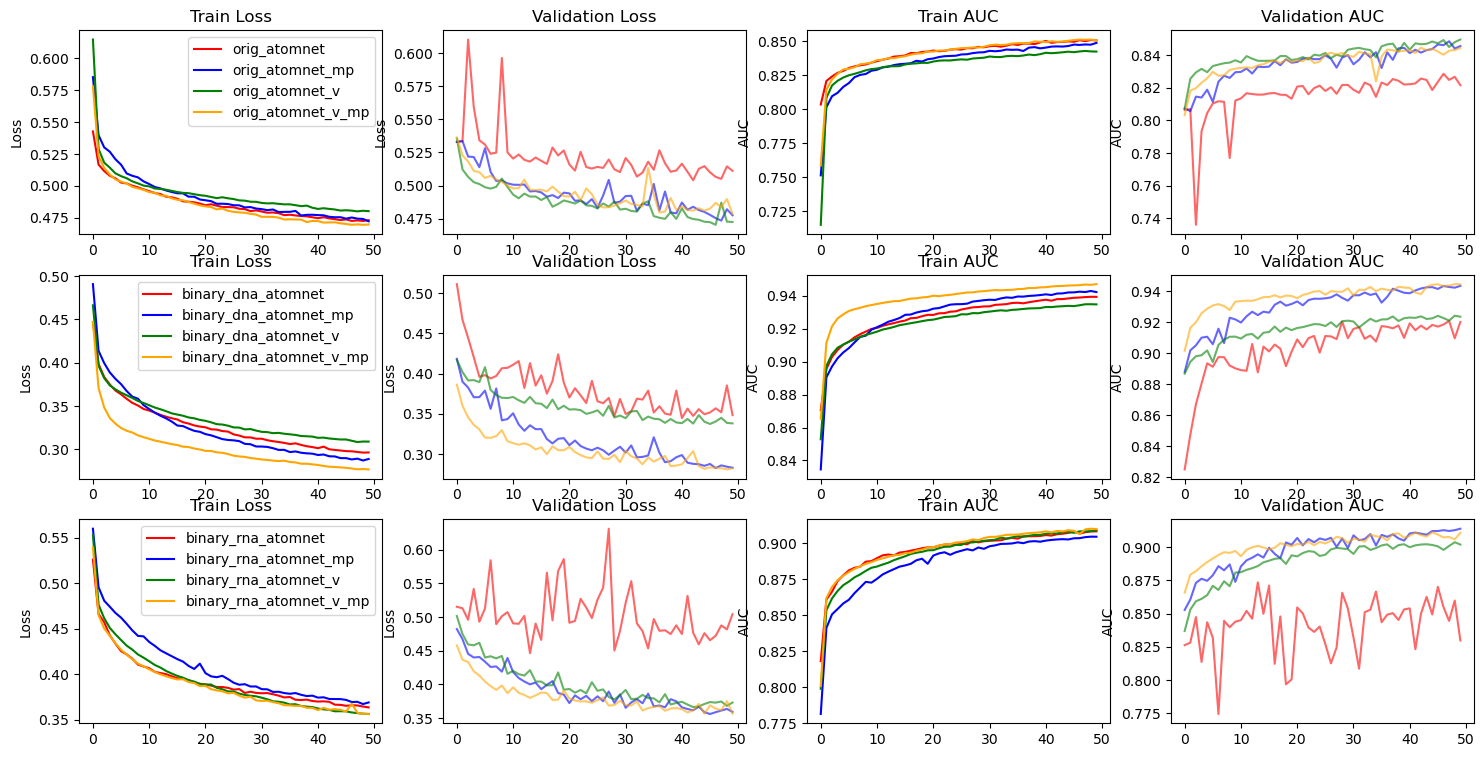

In [37]:
log_dict_orig=parse_train_log('logs/log_orig.txt')
log_dict_dna=parse_train_log('logs/new_log_dna_site.txt')
log_dict_rna=parse_train_log('logs/new_log_rna_site.txt')

display(dict_to_df(log_dict_orig))
display(dict_to_df(log_dict_dna))
display(dict_to_df(log_dict_rna))

fig, ax=plt.subplots(3,4 , figsize=(18,9))
ax=ax.reshape(-1)

draw_curves(ax[:4], log_dict_orig)
draw_curves(ax[4:8], log_dict_dna)
draw_curves(ax[8:], log_dict_rna)
fig.savefig("images/site_curves.pdf", format="pdf", bbox_inches='tight',pad_inches=0)
fig.show()


ppi_search_atomnet_v_mp
ppi_search_atomnet
ppi_search_atomnet_v
ppi_search_atomnet_mp
npi_search_atomnet_v_mp
npi_search_atomnet
npi_search_atomnet_v
npi_search_atomnet_mp


,ppi_search_atomnet,ppi_search_atomnet_mp,ppi_search_atomnet_v,ppi_search_atomnet_v_mp
train,0.89893,0.90127,0.89127,0.90448
val,0.89391,0.89761,0.88808,0.90305
test,0.87362,0.87541,0.86474,0.87767


,npi_search_atomnet,npi_search_atomnet_mp,npi_search_atomnet_v,npi_search_atomnet_v_mp
train,0.89722,0.90900,0.89526,0.91111
val,0.86739,0.90696,0.89419,0.91060
test,0.84242,0.87837,0.85625,0.87845


/home/domain/data/prog/miniconda3/envs/dmasif/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


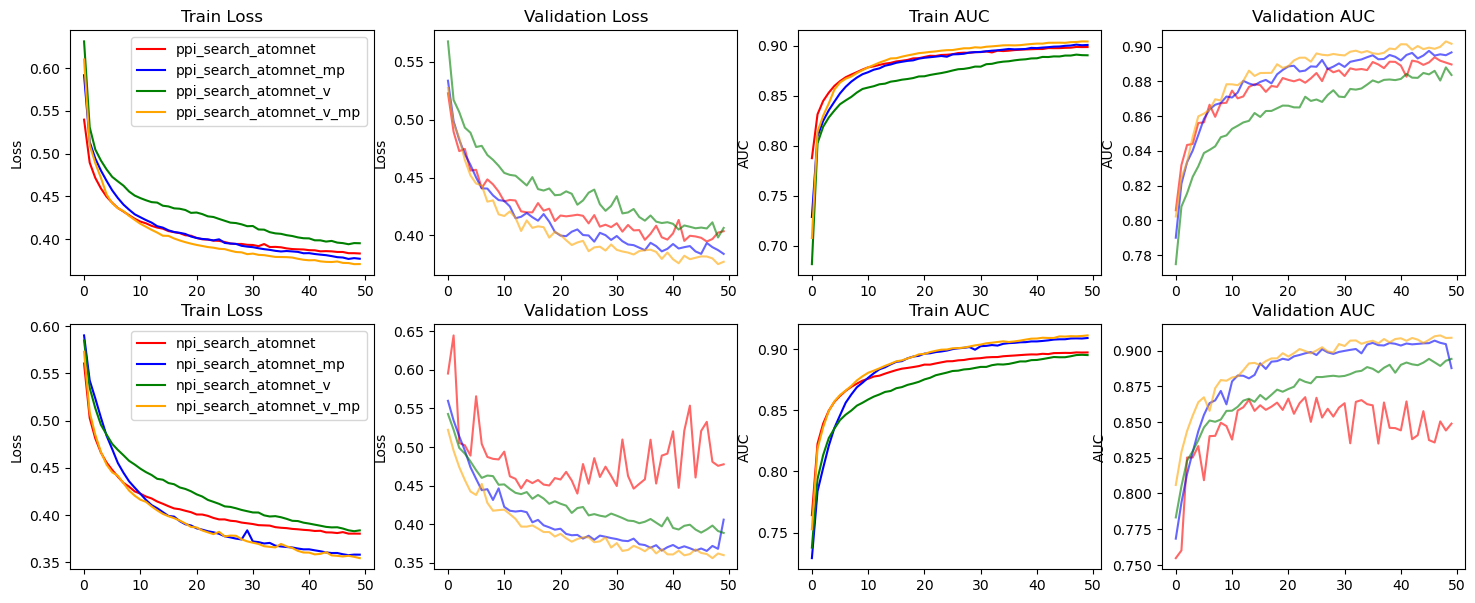

In [39]:
log_dict_orig=parse_train_log('logs/ppi_search_last.log')
log_dict_na=parse_train_log('logs/npi_search_last.log')

display(dict_to_df(log_dict_orig))
display(dict_to_df(log_dict_na))

fig, ax=plt.subplots(2,4 , figsize=(18,7))
ax=ax.reshape(-1)

draw_curves(ax[:4], log_dict_orig)
draw_curves(ax[4:8], log_dict_na)
fig.savefig("images/search_curves.pdf", format="pdf", bbox_inches='tight',pad_inches=0)
fig.show()


In [4]:
import json

In [70]:
with open('logs/ddp.log') as f:
    log_info=f.readlines()
    log_arr=[]
    for string in log_info:
        if 'Arguments' in string:
            batch_size=int(string.split('batch_size=')[1].split(',')[0])
            num_devices=string.split('devices=[')[1].split(']')[0].count(', ')+1
        if 'Execution complete' in string:
            t=float(string.split(' ')[-2])
            log_arr.append([batch_size,num_devices,t])
            

In [85]:
x1=[x[1] for x in log_arr if x[0]==8]
y1=[x[2] for x in log_arr if x[0]==8]
x2=[x[1] for x in log_arr if x[0]!=8]
y2=[x[2] for x in log_arr if x[0]!=8]

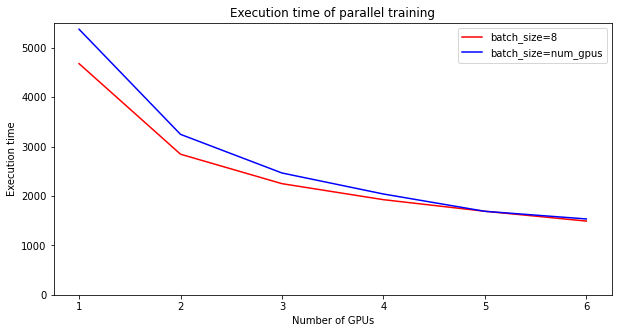

In [86]:
plt.figure(figsize=(10,5))
plt.title('Execution time of parallel training')
plt.plot(x1, y1, label='batch_size=8', color='red')
plt.plot(x2, y2, label='batch_size=num_gpus', color='blue')
plt.legend()
plt.xlabel('Number of GPUs')
plt.ylim(0,5500)
plt.ylabel('Execution time')
plt.savefig("images/exec_time.pdf", format="pdf", bbox_inches='tight',pad_inches=0)
plt.show()